<h3>Exploration Exercise<h3/>

<h2>Our Zillow scenario continues:

As a Codeup data science graduate, you want to show off your skills to the Zillow data science team in hopes of getting an interview for a position you saw pop up on LinkedIn. You thought it might look impressive to build an end-to-end project in which you use some of their Kaggle data to predict property values using some of their available features; who knows, you might even do some feature engineering to blow them away. Your goal is to predict the values of single unit properties using the observations from 2017.

In these exercises, you will run through the stages of exploration as you continue to work toward the above goal. Use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.<h2/>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import os
import env
from sklearn.preprocessing import MinMaxScaler
from scipy import stats

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from scipy import stats

from math import sqrt

# import splitting and imputing functions
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# turn off pink boxes for demo
import warnings
warnings.filterwarnings("ignore")

# imports for modeling:
# import Logistic regression
from sklearn.linear_model import LogisticRegression
# import K Nearest neighbors:
from sklearn.neighbors import KNeighborsClassifier
# import Decision Trees:
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
# import Random Forest:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix

# interpreting our models:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
from wrangle import wrangle_zillow
df = wrangle_zillow()
df.head() 

,Bedroom_Count,Bathroom_Count,Finished_sqft,Tax_value_dollars,Year_built,Tax_amount,fips
2,0,0.0,73026.0,1434941.0,1959,20800.37,6037.0
3,0,0.0,5068.0,1174475.0,1948,14557.57,6037.0
4,0,0.0,1776.0,440101.0,1947,5725.17,6037.0
5,0,0.0,2400.0,287634.0,1943,3661.28,6037.0
7,0,0.0,3611.0,698984.0,1946,7857.84,6037.0


In [3]:
df.shape

(2901918, 7)

In [4]:
from wrangle import split_zillow_data
train, validate, test = split_zillow_data(df)
train.head()

,Bedroom_Count,Bathroom_Count,Finished_sqft,Tax_value_dollars,Year_built,Tax_amount,fips
515265,3,2.0,1388.0,347987.0,1955,4073.83,6037.0
2834387,5,3.0,2425.0,705314.0,1975,8140.72,6111.0
282747,1,1.0,1100.0,389612.0,2005,5095.62,6037.0
1087577,2,2.0,1215.0,367965.0,2002,4497.36,6037.0
1663081,4,2.0,1705.0,333600.0,1950,4731.08,6037.0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1625073 entries, 515265 to 1042963
Data columns (total 7 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Bedroom_Count      1625073 non-null  int64  
 1   Bathroom_Count     1625073 non-null  float64
 2   Finished_sqft      1625073 non-null  float64
 3   Tax_value_dollars  1625073 non-null  float64
 4   Year_built         1625073 non-null  int64  
 5   Tax_amount         1625073 non-null  float64
 6   fips               1625073 non-null  float64
dtypes: float64(5), int64(2)
memory usage: 99.2 MB


In [6]:
train.describe()

,Bedroom_Count,Bathroom_Count,Finished_sqft,Tax_value_dollars,Year_built,Tax_amount,fips
count,1.625073e+06,1.625073e+06,1.625073e+06,1.625073e+06,1.625073e+06,1.625073e+06,1.625073e+06
mean,3.171115e+00,2.271881e+00,1.835669e+03,4.446771e+05,1.964236e+03,5.454693e+03,6.047856e+03
std,1.185865e+00,1.030316e+00,1.864023e+03,7.236945e+05,2.362772e+01,8.759358e+03,2.006785e+01
min,0.000000e+00,0.000000e+00,1.000000e+00,2.200000e+01,1.802000e+03,5.040000e+00,6.037000e+03
25%,2.000000e+00,2.000000e+00,1.219000e+03,1.926390e+05,1.950000e+03,2.544340e+03,6.037000e+03
50%,3.000000e+00,2.000000e+00,1.581000e+03,3.244410e+05,1.963000e+03,4.058280e+03,6.037000e+03
75%,4.000000e+00,3.000000e+00,2.148000e+03,5.167130e+05,1.981000e+03,6.274550e+03,6.059000e+03
max,2.500000e+01,3.200000e+01,9.525760e+05,2.710046e+08,2.016000e+03,3.277055e+06,6.111000e+03


In [7]:
df.columns

Index(['Bedroom_Count', 'Bathroom_Count', 'Finished_sqft', 'Tax_value_dollars',
       'Year_built', 'Tax_amount', 'fips'],
      dtype='object')

<h3>Univariate Look<h3/>

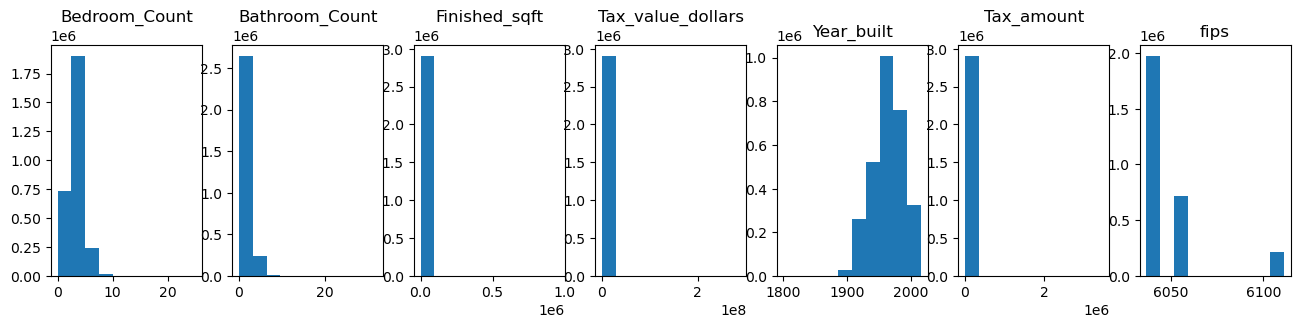

In [8]:
# Let's look at the distributions of each feature
plt.figure(figsize=(16, 3))

# List of columns
cols = ['Bedroom_Count', 'Bathroom_Count', 'Finished_sqft', 'Tax_value_dollars',
       'Year_built', 'Tax_amount', 'fips']

for i, col in enumerate(cols):
    
    # i starts at 0, but plot no.s should start at 1
    plot_number = i + 1 
    
    # Create subplot.
    plt.subplot(1,7, plot_number)
    
    # Title with column name.
    plt.title(col)
    
    # Display histogram for column.
    df[col].hist()
    
    # Hide gridlines.
    plt.grid(False)

<h4>Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

<h4/>

<Figure size 1600x300 with 0 Axes>

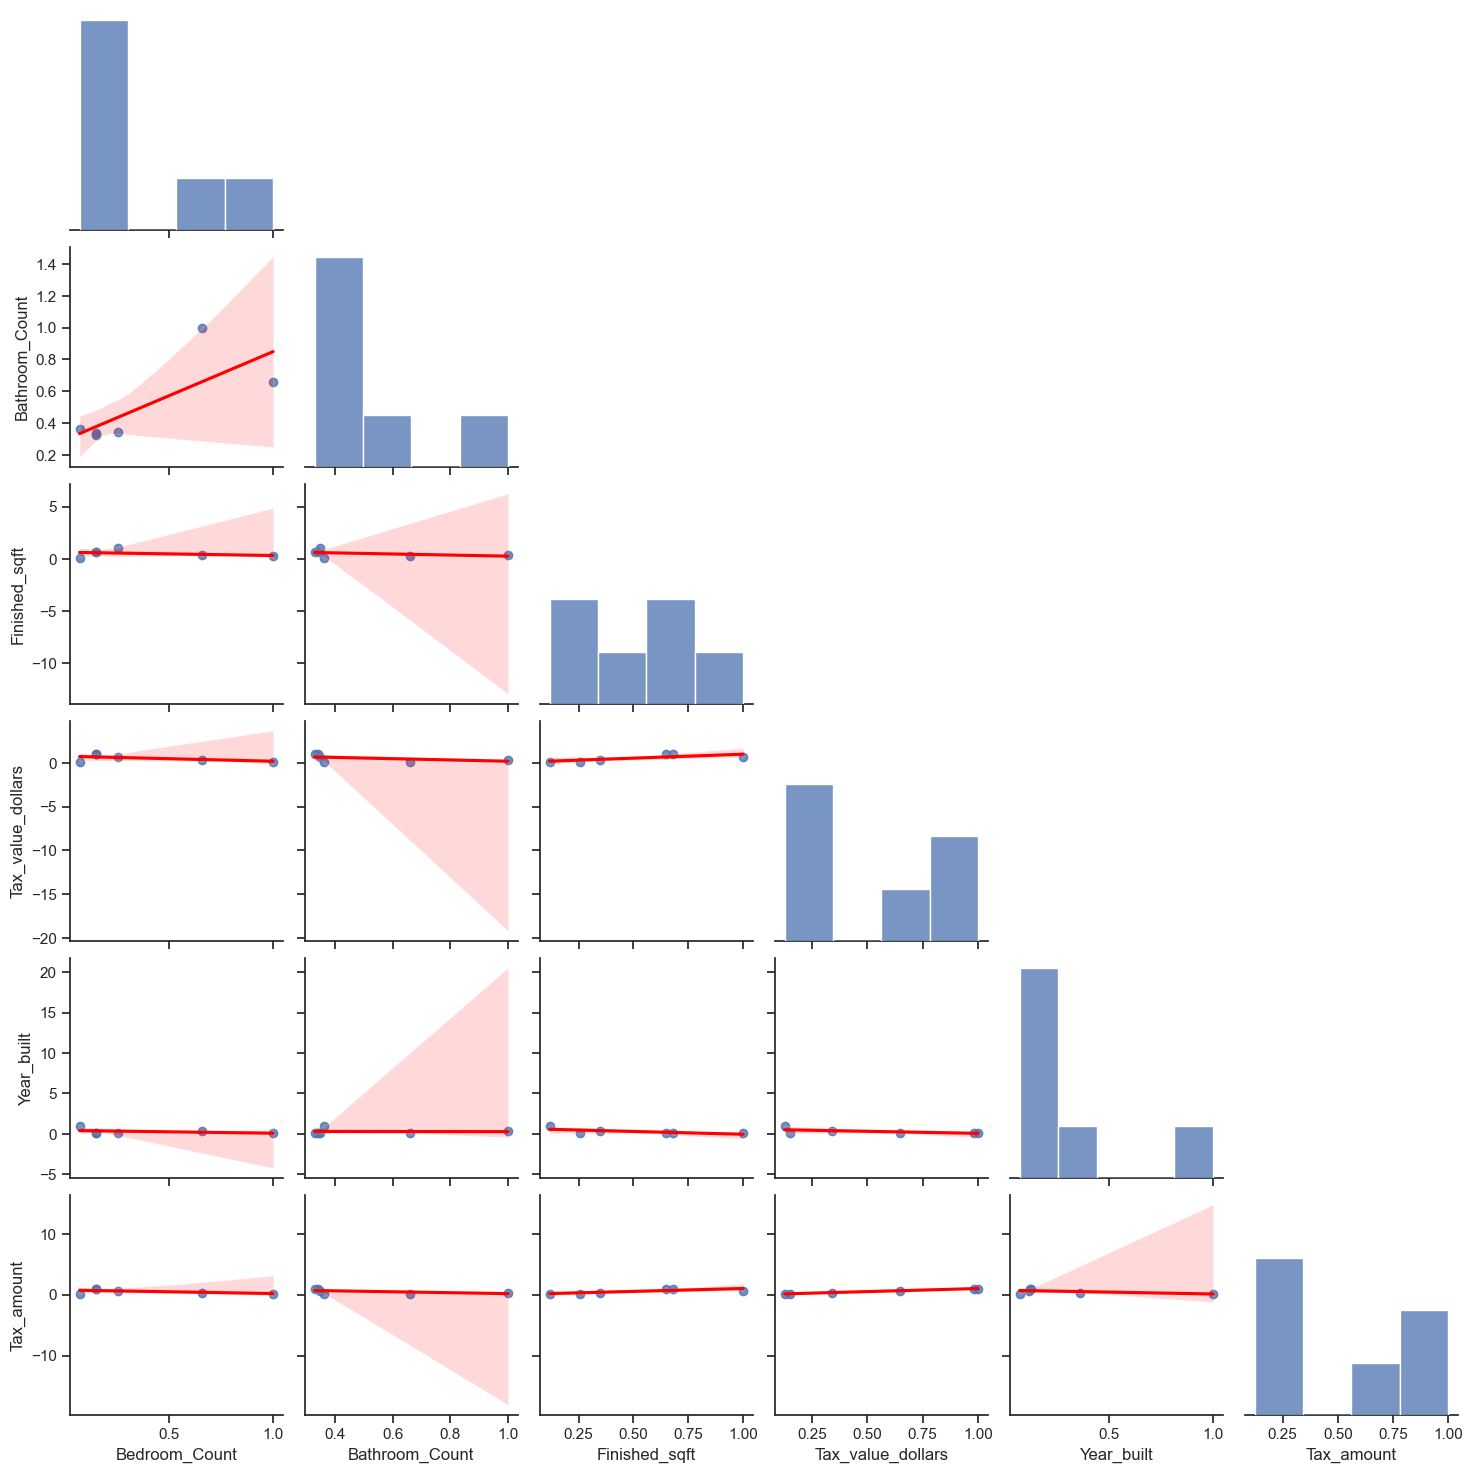

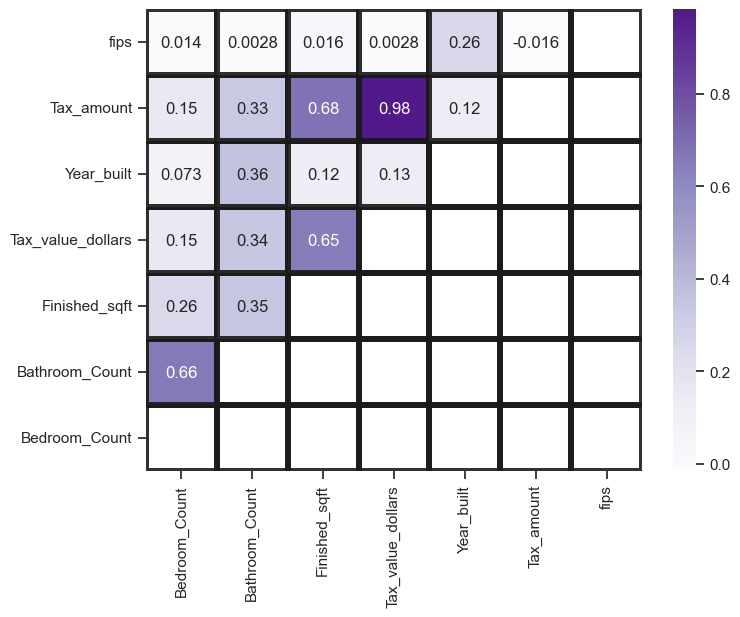

In [9]:
from wrangle import plot_variable_pairs

#Plotting all the pairwise relationships along with the regression line for each pair.
plot_variable_pairs(train)

<h4>Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

<h4/>

In [10]:
train.head(2)

,Bedroom_Count,Bathroom_Count,Finished_sqft,Tax_value_dollars,Year_built,Tax_amount,fips
515265,3,2.0,1388.0,347987.0,1955,4073.83,6037.0
2834387,5,3.0,2425.0,705314.0,1975,8140.72,6111.0


In [11]:
X_train = train.drop(columns='Tax_value_dollars')
y_train = train[['Tax_value_dollars']]
cat_cols = ['Year_built', 'fips']
num_cols = ['Bedroom_Count', 'Bathroom_Count', 'Finished_sqft', 'Tax_value_dollars', 'Tax_amount']

Distribution of Bedroom_Count


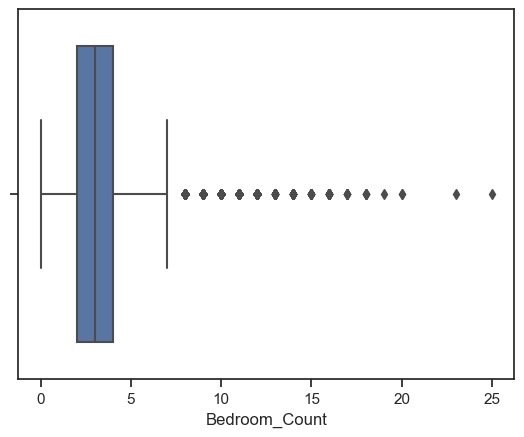

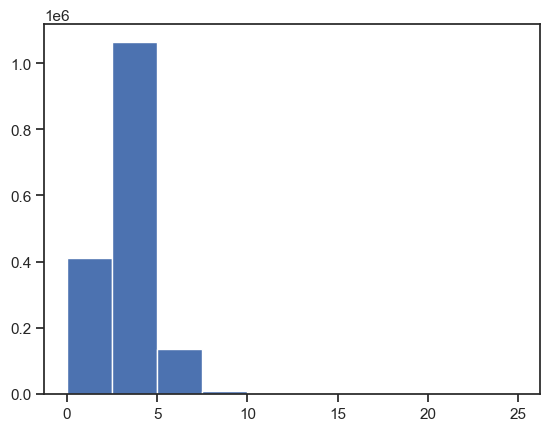

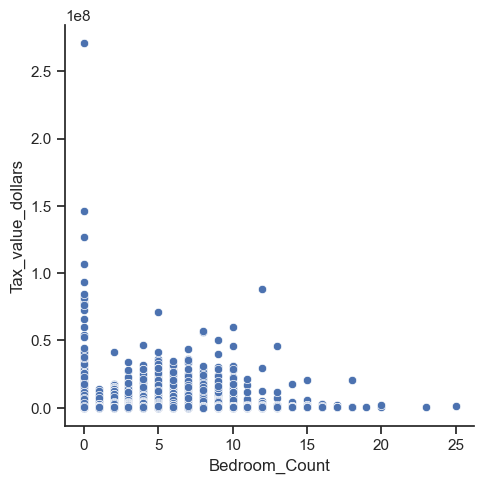

Distribution of Bathroom_Count


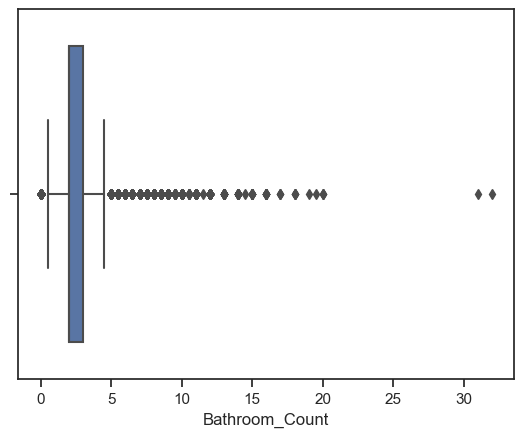

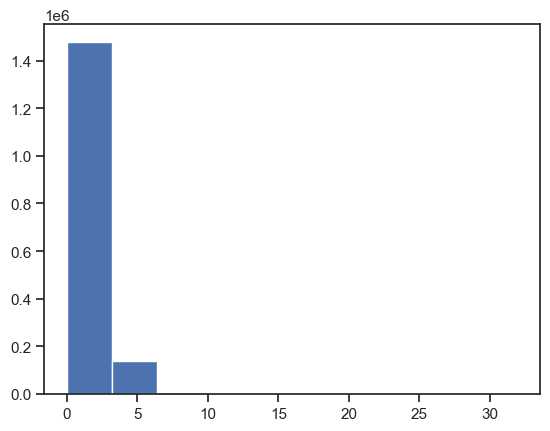

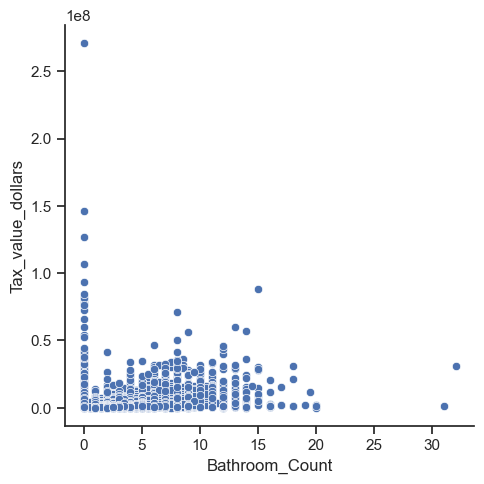

Distribution of Finished_sqft


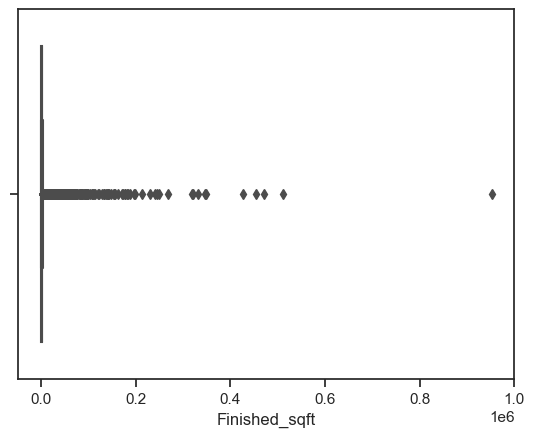

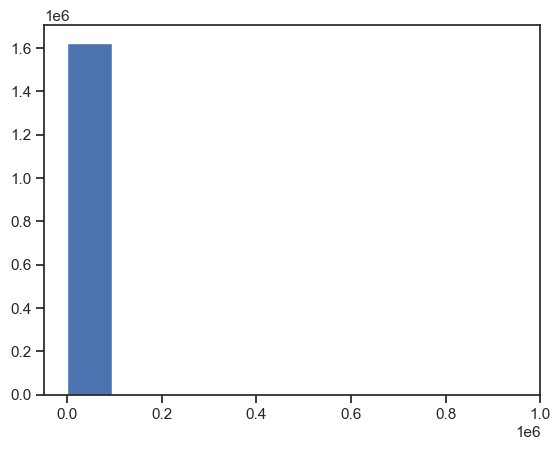

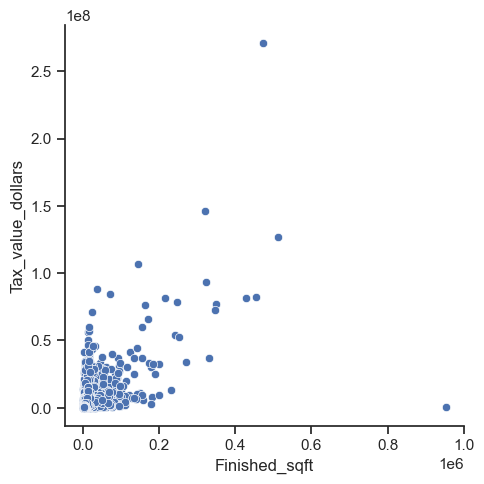

Distribution of Year_built


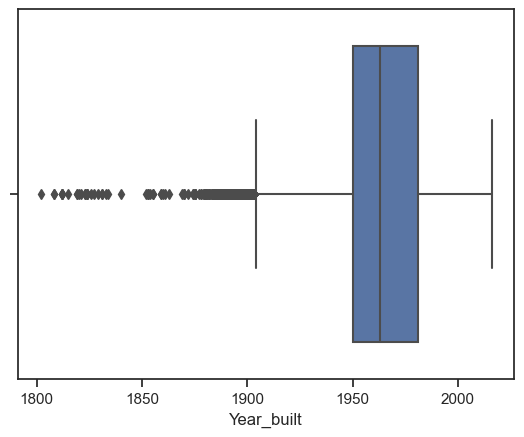

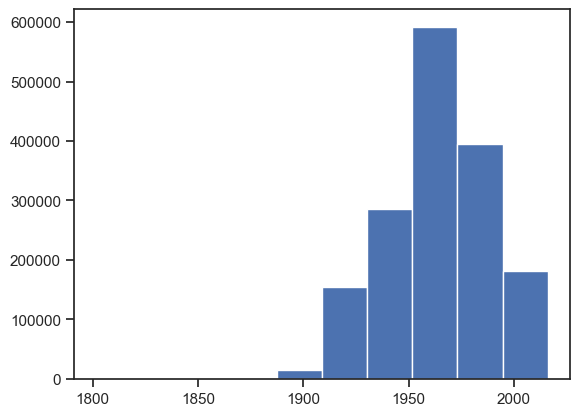

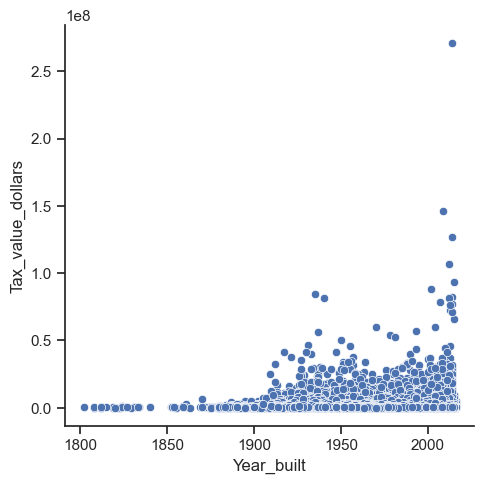

Distribution of Tax_amount


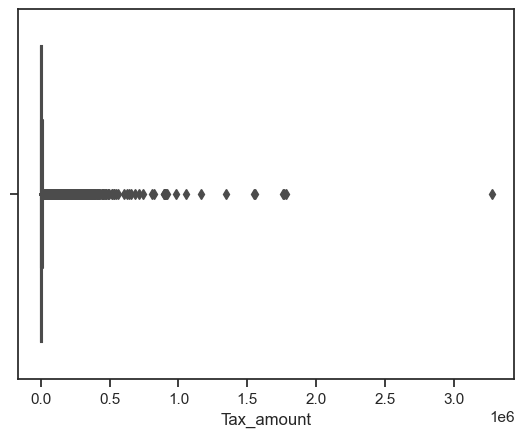

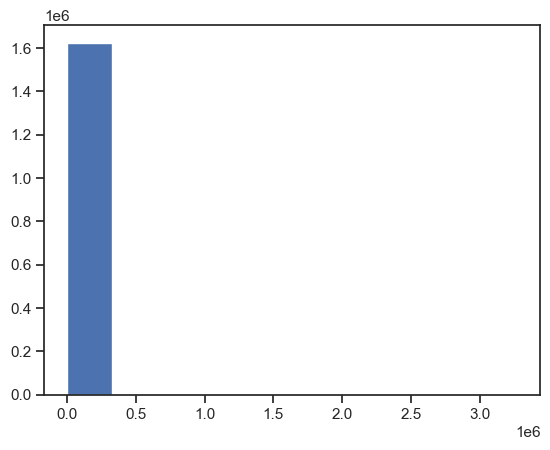

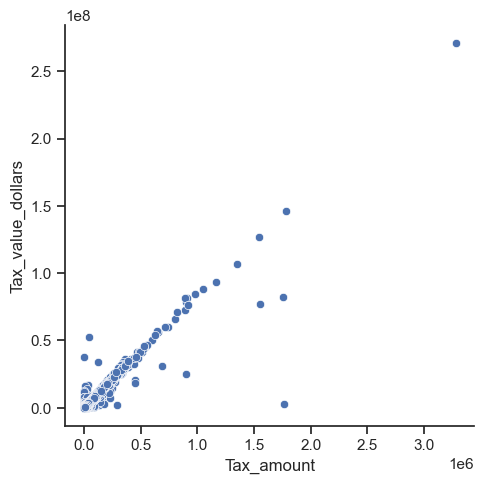

Distribution of fips


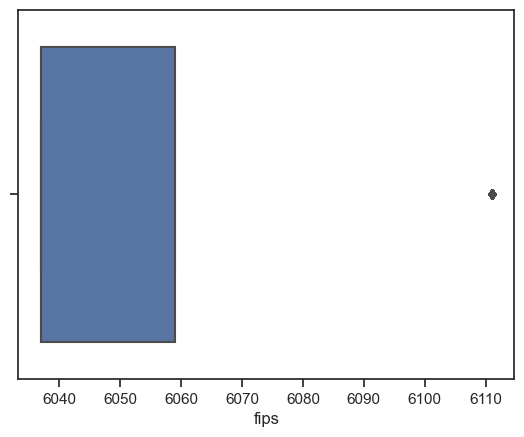

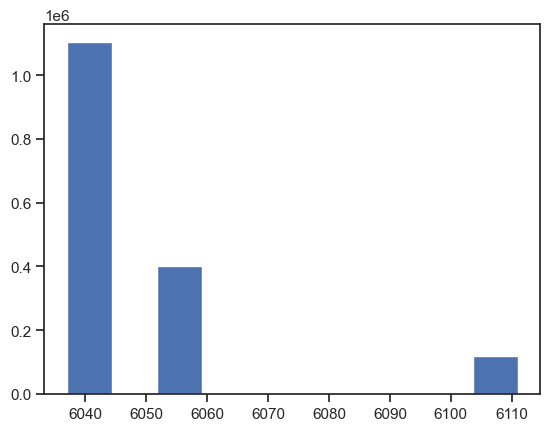

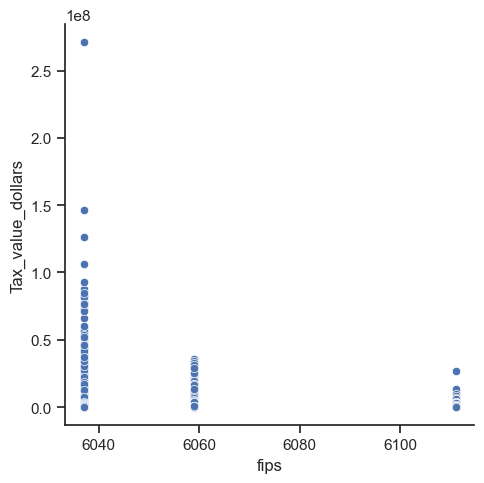

In [12]:
from wrangle import plot_categorical_and_continuous_vars

# Let's look at categorical and continuous variables
plot_categorical_and_continuous_vars(df)

Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.

<h4>Come up with some initial hypotheses based on your goal of predicting property value.

<h4/>

- Property value, based on Tax value dollars, varies primarily per the County (fips)
- Newer homes are taxed at a higher rate than older homes
- Homes with higher 'Finished_sqft' are taxed higher than homes with lower square footage
- 

<h4>Visualize all combinations of variables in some way.

<h4/>

<h2>Run the appropriate statistical tests where needed.

<h2/>

<h2>Does property value (Tax value dollars), correlate with the feature fips (county)?<h2/>

$H_0$ There is no correlation between tax value dollars and fips.\
$H_a$ There is a correlation between tax value dollars and fips.

In [13]:
#Since theis is a comparison between a continuous feature and a categorical feature, I"m going to do a XXXXX test.

In [14]:
null = "There is no association between tax value dollars & fips."

In [15]:
#Set the alpha
alpha = 0.05

In [16]:
observed = pd.crosstab(train.Tax_value_dollars, train.fips)
observed

fips,6037.0,6059.0,6111.0
Tax_value_dollars,,,
22.0,5,0,0
23.0,2,0,0
31.0,1,0,0
100.0,1,0,0
101.0,1,0,0
...,...,...,...
93208151.0,1,0,0
106553142.0,1,0,0
126659029.0,1,0,0


In [17]:
stats.chi2_contingency(observed)

Chi2ContingencyResult(statistic=1906011.4182703253, pvalue=0.0, dof=964578, expected_freq=array([[3.39797351, 1.2359414 , 0.36608509],
       [1.3591894 , 0.49437656, 0.14643404],
       [0.6795947 , 0.24718828, 0.07321702],
       ...,
       [0.6795947 , 0.24718828, 0.07321702],
       [0.6795947 , 0.24718828, 0.07321702],
       [0.6795947 , 0.24718828, 0.07321702]]))

In [18]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [19]:
print(f'''Observed:
{observed.values}

Expected:
{expected.astype(int)}
_____________________

𝛘² = {chi2:.4f}
p  = {p:.4f}
''')

Observed:
[[5 0 0]
 [2 0 0]
 [1 0 0]
 ...
 [1 0 0]
 [1 0 0]
 [1 0 0]]

Expected:
[[3 1 0]
 [1 0 0]
 [0 0 0]
 ...
 [0 0 0]
 [0 0 0]
 [0 0 0]]
_____________________

𝛘² = 1906011.4183
p  = 0.0000



In [20]:
#Conclude:

if p < alpha:
    print(f'We reject H₀:{null}')
else:
    print(f'We FAIL to reject H₀:{null}')

We reject H₀:There is no association between tax value dollars & fips.


My takeaway:
There is a relationship between the two features fips and Tax_value_dollars

<h2>Does Year_built correlate with Tax_value_dollars (property value)?<h2/>

$H_0$ There is no correlation between tax value dollars and Year_built.\
$H_a$ There is a correlation between tax value dollars and Year_built.

In [21]:
prop_value = train[['Tax_value_dollars', 'Year_built']]
prop_value.head()

,Tax_value_dollars,Year_built
515265,347987.0,1955
2834387,705314.0,1975
282747,389612.0,2005
1087577,367965.0,2002
1663081,333600.0,1950


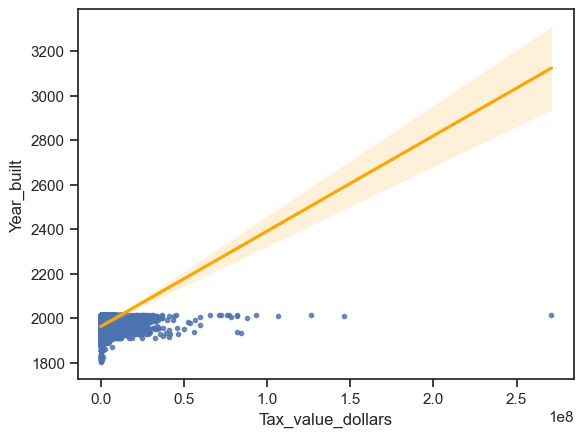

In [22]:
sns.regplot(x='Tax_value_dollars', y='Year_built', data=prop_value, marker=".", line_kws={'color':'orange'})
plt.show()

<h4>What does the distributions look like?<h4/>

<Axes: >

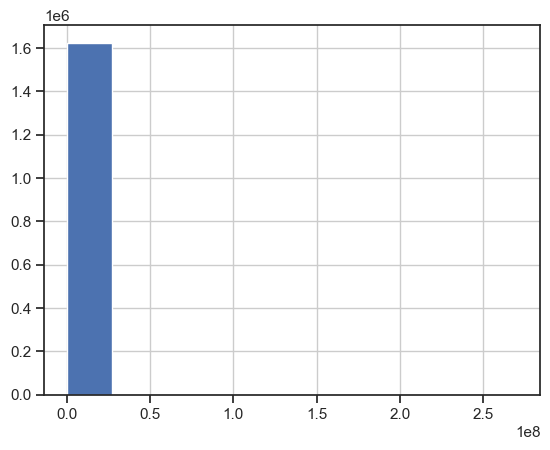

In [23]:
#Test for assumptions (distributions)

prop_value.Tax_value_dollars.hist()

<Axes: >

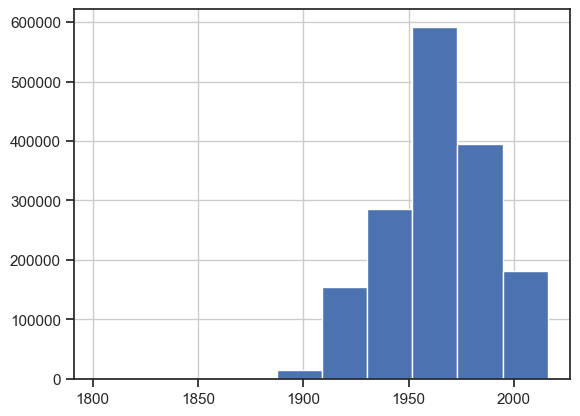

In [24]:
prop_value.Year_built.hist()

In [25]:
def eval_dist(r, p, α=0.05):
    if p > α:
        return print(f"""The data is normally distributed""")
    else:
        return print(f"""The data is NOT normally distributed""")

In [26]:
x = prop_value.Year_built
y = prop_value.Tax_value_dollars

In [27]:
r,p = stats.shapiro(prop_value.Year_built)
r,p

(0.9857020974159241, 0.0)

In [28]:
eval_dist(r,p)

The data is NOT normally distributed


In [29]:
r,p = stats.shapiro(prop_value.Tax_value_dollars)
r,p

(0.30652254819869995, 0.0)

In [30]:
eval_dist(r,p)

The data is NOT normally distributed


In [31]:
#Because the data is NOT normally distributed, use the Spearmans
r,p = stats.spearmanr(prop_value.Year_built, prop_value.Tax_value_dollars)
r,p

(0.2542196312850118, 0.0)

<h3>Draw Conclusions<h3/>

In [32]:
def eval_Spearmanresult(r,p,α=0.05):
    """
    
    """
    if p < α:
        return print(f"""We reject H₀, there appears to be a monotonic relationship.
Spearman's rs: {r:2f}.
P-value: {p}""")
    else:
        return print(f"""We fail to reject H₀: that there does not appear to be a monotonic relationship.
Spearman’s r: {r:2f}
P-value: {p}""")

In [33]:
eval_Spearmanresult(r,p)

We reject H₀, there appears to be a monotonic relationship.
Spearman's rs: 0.254220.
P-value: 0.0


My takeaway:
There is a monotonic relationship between the two features Year_built and Tax_value_dollars

With an r of .25, the correlation is weak-moderate.

<h2>Does 'Finished_sqft' correlate with Tax value dollars?<h2/>

$H_0$ There is no correlation between tax value dollars and Finished_sqft.\
$H_a$ There is a correlation between tax value dollars and Finished_sqft.

In [34]:
null = 'There is no correlation between tax value dollars and Finished_sqft'

In [35]:
train.columns

Index(['Bedroom_Count', 'Bathroom_Count', 'Finished_sqft', 'Tax_value_dollars',
       'Year_built', 'Tax_amount', 'fips'],
      dtype='object')

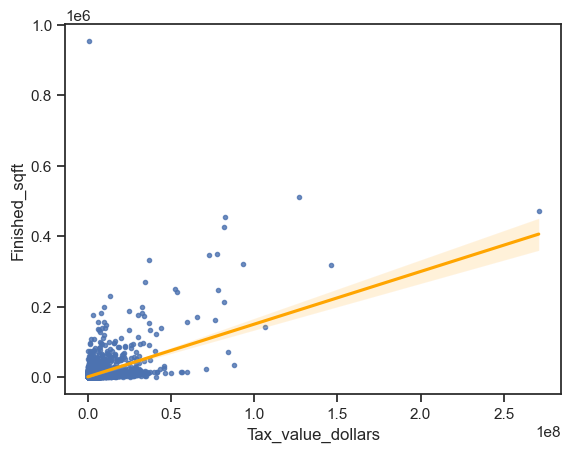

In [36]:
sns.regplot(x='Tax_value_dollars', y='Finished_sqft', data=train, marker=".", line_kws={'color':'orange'})
plt.show()

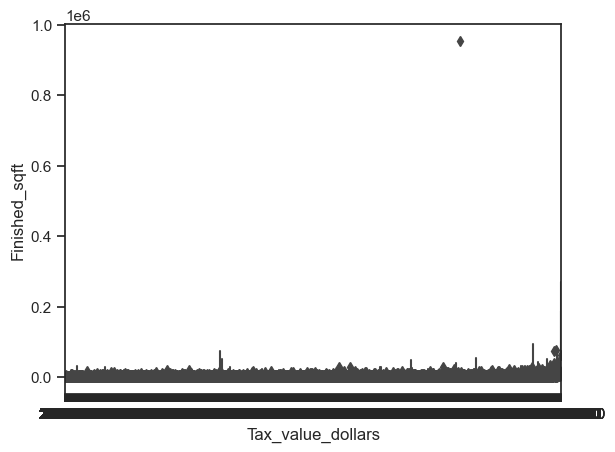

In [37]:
sns.boxplot(data=train, x='Tax_value_dollars', y='Finished_sqft')
plt.show()

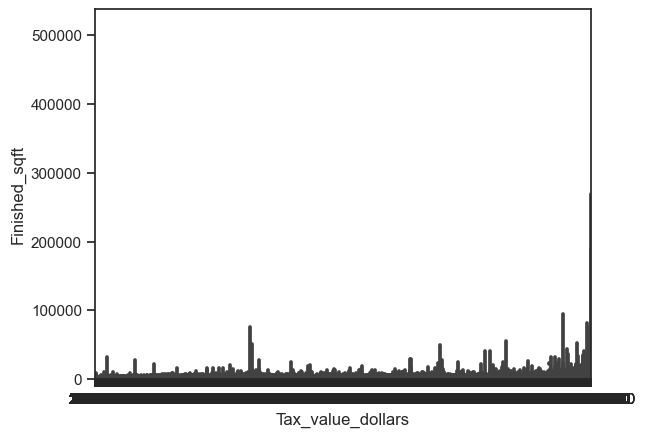

In [38]:
sns.barplot(data=train, x='Tax_value_dollars', y='Finished_sqft')
plt.show()

In [39]:
r,p = stats.shapiro(train.Tax_value_dollars)
r,p

(0.30652254819869995, 0.0)

In [40]:
eval_dist(r,p)

The data is NOT normally distributed


In [41]:
r,p = stats.shapiro(train.Finished_sqft)
r,p

(0.24395811557769775, 0.0)

In [42]:
eval_dist(r,p)

The data is NOT normally distributed


In [43]:
def eval_Pearsonresult(r,p,α=0.05):
    """
    
    """
    if p < α:
        return print(f"""We reject H₀, there appears to be a linear relationship with a Correlation Coefficient of {r:2f}.
P-value: {p}""")
    else:
        return print(f"""We fail to reject H₀: that there does not appear to be a linear relationship.
Pearson’s r: {r:2f}
P-value: {p}""")

In [44]:
eval_Pearsonresult(r,p,)

We reject H₀, there appears to be a linear relationship with a Correlation Coefficient of 0.243958.
P-value: 0.0


<h3>Draw Conclusions<h3/>

<h4>What independent variables are correlated with the dependent variable, home value?

<h4/>

<h4>Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?

<h4/>

<h4>Make sure to document your takeaways from visualizations and statistical tests as well as the decisions you make throughout your process.

<h4/>

<h4>Explore your dataset with any other visualizations you think will be helpful.

<h4/>